In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
ratings_df = pd.read_json('ratings_small.json')
movies_df = pd.read_json('movies_metadata.json')


In [3]:
# ratings_df DataFrame'i hakkında bilgiler gösterme
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [4]:
# ratings_df DataFrame'i hakkında bilgiler gösterme
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [5]:
# movies_df DataFrame'i hakkında bilgiler gösterme
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0.0,6.5,92.0
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,0.0,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0.0,5.7,173.0


In [6]:
# movies_df DataFrame'i hakkında bilgiler gösterme
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

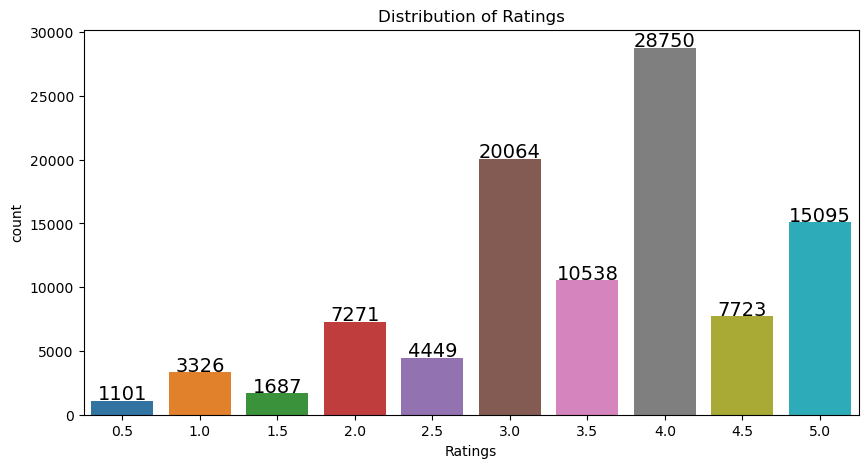

In [7]:
# Film derecelendirmelerinin dağılımını gösteren çubuk grafiği oluşturma

#Grafiğin boyutu belirlendi
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=ratings_df, x='rating')

# Sayıları hesaplayın ve dizine göre sıralayın
labels = (ratings_df['rating'].value_counts().sort_index())

#Grafiğin Başlığı
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

# Çubukların üstüne sayım değerlerine açıklama ekleme
for i, v in enumerate(labels):
    ax.text(i, v + 100, str(v), horizontalalignment='center', size=14, color='black')

plt.show()

In [8]:
# Eksik başlık değerlerini kontrol etme ve temizleme
title_mask = movies_df['title'].isna()
#Eksik başlıl değerine sahip satırlar çıkarılarak temizlendi
movies_df = movies_df.loc[title_mask == False]

In [9]:
# 'id' sütununu integer türüne dönüştürme
movies_df = movies_df.astype({'id': 'int64'})

In [10]:
# 'ratings_df' ve 'movies_df' DataFrame'lerini birleştirme
df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id')
df.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,2009-12-14 02:52:15,1371,Rocky III
1,4,1371,4.0,2000-02-06 04:11:42,1371,Rocky III
2,7,1371,3.0,1996-12-29 14:19:20,1371,Rocky III
3,19,1371,4.0,1997-02-06 01:43:24,1371,Rocky III
4,21,1371,3.0,1997-01-21 13:11:03,1371,Rocky III


In [11]:
# Gereksiz sütunları çıkararak ve duplicate satırları temizleyerek DataFrame'i düzenleme
df.drop(['timestamp', 'id'], axis=1, inplace=True)
df = df.drop_duplicates(['userId','title'])

In [12]:
# 'userId', 'title', ve 'rating' sütunları içeren pivot tablosu oluşturma
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

In [13]:
# Pivot tablosunu integer türüne dönüştürme
df_pivot = df_pivot.astype('int64')

In [14]:
# Derecelendirmeleri kodlama
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.apply(lambda x: x.map(encode_ratings))

In [15]:
df_pivot.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Apriori algoritması ile sık öğe kümelerini bulma
from mlxtend.frequent_patterns import apriori

df_pivot = df_pivot.astype(bool)

# Apriori algoritması kullanarak, belirli bir destek değerinden (min_support=0.07) büyük sık öğe kümelerini bul
frequent_itemset = apriori(df_pivot, min_support=0.07, use_colnames=True)


In [17]:
# Oluşturulan sık öğe kümelerini görüntüleme
frequent_itemset.head()

,support,itemsets
0,0.129657,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.292101,(5 Card Stud)
4,0.093890,(A Brief History of Time)


In [18]:
# İlişkisel kuralları oluşturma
from mlxtend.frequent_patterns import association_rules

# Sık görülen öğe kümelerinden ilişkisel kuralları 'lift' metriği ve 1'e eşit veya büyük eşik değeri ile oluştur.
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)


In [19]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(20,000 Leagues Under the Sea)",(48 Hrs.),0.129657,0.298063,0.076006,0.586207,1.966724,0.037360,1.696349,0.564766
1,(48 Hrs.),"(20,000 Leagues Under the Sea)",0.298063,0.129657,0.076006,0.255000,1.966724,0.037360,1.168245,0.700262
2,"(20,000 Leagues Under the Sea)",(A Nightmare on Elm Street),0.129657,0.266766,0.081967,0.632184,2.369807,0.047379,1.993480,0.664134
3,(A Nightmare on Elm Street),"(20,000 Leagues Under the Sea)",0.266766,0.129657,0.081967,0.307263,2.369807,0.047379,1.256382,0.788322
4,"(20,000 Leagues Under the Sea)",(Back to the Future Part II),0.129657,0.210134,0.077496,0.597701,2.844379,0.050251,1.963381,0.745028


In [20]:
# İlişkisel kuralları lift değerine göre sıralama
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
70959,(On Guard),"(The Garden of Eden, Muxmäuschenstill)",0.087928,0.099851,0.070045,0.796610,7.977991,0.061265,4.425733,0.958976
70958,"(The Garden of Eden, Muxmäuschenstill)",(On Guard),0.099851,0.087928,0.070045,0.701493,7.977991,0.061265,3.055440,0.971678
197235,"(Rope, Big Fish)","(Psycho, All the Way Boys)",0.092399,0.095380,0.070045,0.758065,7.947833,0.061232,3.739096,0.963176
197234,"(Psycho, All the Way Boys)","(Rope, Big Fish)",0.095380,0.092399,0.070045,0.734375,7.947833,0.061232,3.416849,0.966350
2541039,"(Back to the Future Part II, Sissi, Monsoon We...","(Cockles and Muscles, 48 Hrs., A Nightmare on ...",0.098361,0.093890,0.071535,0.727273,7.746032,0.062300,3.322404,0.965909


In [21]:
# 'Men in Black II' filmine odaklanarak ilişkisel kuralların analizi
df_MIB = df_res[df_res['antecedents'].apply(lambda x: ('Men in Black II',) == tuple(x))]
df_MIB = df_MIB[df_MIB['lift'] > 2]

In [22]:
df_MIB.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63401,(Men in Black II),"(Terminator 3: Rise of the Machines, Nostalgia)",0.33383,0.080477,0.077496,0.232143,2.884590,0.050631,1.197518,0.980726
56667,(Men in Black II),"(Jarhead, Sleepless in Seattle)",0.33383,0.077496,0.073025,0.218750,2.822716,0.047155,1.180805,0.969319
63407,(Men in Black II),"(The 39 Steps, Nostalgia)",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
380668,(Men in Black II),"(The Talented Mr. Ripley, Young and Innocent, ...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
1167106,(Men in Black II),"(The Talented Mr. Ripley, Young and Innocent, ...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865


In [23]:
# DataFrame'den 'consequents' sütunundaki değerleri al
movies = df_MIB['consequents'].values

# Benzersiz filmleri tutacak bir liste oluştur
movie_list = []

# Her bir 'movie' içindeki 'title' değerlerini kontrol et
for movie in movies:
    for title in movie:
        # Eğer 'title' daha önce 'movie_list' içinde bulunmamışsa, listeye ekle
        if title not in movie_list:
            movie_list.append(title)


In [24]:
movie_list[0:10]

['Terminator 3: Rise of the Machines',
 'Nostalgia',
 'Jarhead',
 'Sleepless in Seattle',
 'The 39 Steps',
 'The Talented Mr. Ripley',
 'Young and Innocent',
 'Point Break',
 'The Thomas Crown Affair',
 'Once Were Warriors']

In [25]:
# 'Jarhead' filmine odaklanarak ilişkisel kuralların analizi
df_another_movie = df_res[df_res['antecedents'].apply(lambda x: ('Jarhead',) == tuple(x))]
df_another_movie = df_another_movie[df_another_movie['lift'] > 2]


# Sonuçları çıkarma ve liste oluşturma
movies_another_movie = df_another_movie['consequents'].values

movie_list_another_movie = []
for movie in movies_another_movie:
    for title in movie:
        if title not in movie_list_another_movie:
            movie_list_another_movie.append(title)

In [26]:
print(movie_list_another_movie[:10])

['48 Hrs.', 'Men in Black II', 'Judgment Night', 'Sleepless in Seattle', 'The Million Dollar Hotel', 'Terminator 3: Rise of the Machines', 'The Passion of Joan of Arc', 'The 39 Steps', 'Solaris', 'Arlington Road']
